In [1]:
from pymoo.core.problem import Problem, ElementwiseProblem
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import numpy as np
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
import pickle

with open('model_and_encoders.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

model = loaded_data['model']
label_encoders = loaded_data['label_encoders']

In [2]:
demo = np.array([label_encoders['type_material'].transform(['1'])[0],
                 25, 50020,
                 label_encoders['type_waveform'].transform(['正弦波'])[0], 0.031419])
demo = demo.reshape(1, -1)
model.predict(demo)

array([2683.71999151])

-3352.1126184067925
34658.6221452355
778955.4992816272
587613.6932422718
553.9547301709164
485351.29529732565
778955.4992816272
481412.08153411286
6969.808329462775
778955.4992816272
778955.4992816272
587613.6932422718
-1614.0516705051286
485351.29529732565
47293.444017148235
505056.0222479381
-734.8029906172828
264894.67107188556
587613.6932422718
778955.4992816272
778955.4992816272
587613.6932422718
485351.29529732565
50942.752083621184
778955.4992816272
778955.4992816272
485351.29529732565
485351.29529732565
778955.4992816272
481412.08153411286
778955.4992816272
262707.26606255333
-3158.8177807609613
485351.29529732565
481412.08153411286
485351.29529732565
92936.78255435264
778955.4992816272
778955.4992816272
23574.643575716647
1627.496103472313
778955.4992816272
40601.77039101971
778955.4992816272
587613.6932422718
778955.4992816272
481412.08153411286
64513.08072851396
371951.07104897284
-2581.2009260045743
778955.4992816272
-2495.4163215872295
505056.0222479381
262707.26606255333


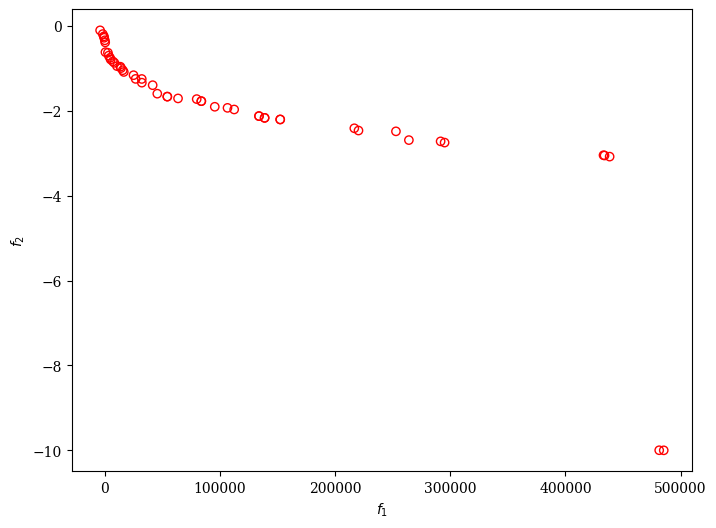

In [3]:
def f(x):
    """ x is a ['type_material' ---, 
    'temp', 
    'freq', 
    'type_waveform', 
    'flux_density_max'] """
    temp, freq, flux_density_max = x

    X = np.array([
        label_encoders['type_material'].transform(['1'])[0], temp, freq,
        label_encoders['type_waveform'].transform(['正弦波'])[0], flux_density_max])
    X = X.reshape(1, -1)
    core_loss = model.predict(X)
    print(core_loss[0])
    return core_loss[0]


def g(x):
    temp, freq, flux_density_max = x
    return freq * flux_density_max


class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=3,
                         n_obj=2,
                         xl=np.array([1, 5e-5, 0]),
                         xu=np.array([100, 10, 1]))

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = [f(x), -g(x)]


problem = MyProblem()
NSGA2(pop_size=100)

algorithm = NSGA2(pop_size=50)

res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.save('figures/pareto.pdf', bbox_inches='tight')

In [15]:
# temp, freq, flux_density_max
res.X[20]

array([68.87268628,  9.99443464,  0.19274099])